# Cómo funciona CSS

## ¿Cómo funciona realmente el CSS?

Cuando un navegador muestra un documento, ha de combinar el contenido con la información de estilo del documento. Procesa el documento en una serie de etapas:

1. El navegador carga el HTML (por ejemplo, lo recibe de la red).

2. Convierte el HTML en un DOM (Modelo de objetos del documento). El DOM representa el documento en la memoria del ordenador.
3. Entonces, el navegador va a buscar la mayor parte de los recursos vinculados al documento HTML, como las imágenes y los videos incrustados y también el CSS vinculado.
> JavaScript aparece un poco más adelante en el proceso, pero no vamos a hablar de ello aún para evitar complicar las cosas.
4. El navegador analiza el CSS y ordena en diferentes «cubos» las diferentes reglas según el tipo de selector. Por ejemplo, elemento, clase, ID, y así sucesivamente. Para cada tipo de selector que encuentre, calcula qué reglas deben aplicarse y a qué nodos en el DOM se les aplica el estilo según corresponda (este paso intermedio se llama árbol de renderización).

5. El árbol de renderización presenta la estructura en que los nodos deben aparecer después de aplicarle las reglas.
6. En la pantalla se muestra el aspecto visual de la página (esta etapa se llama pintura).

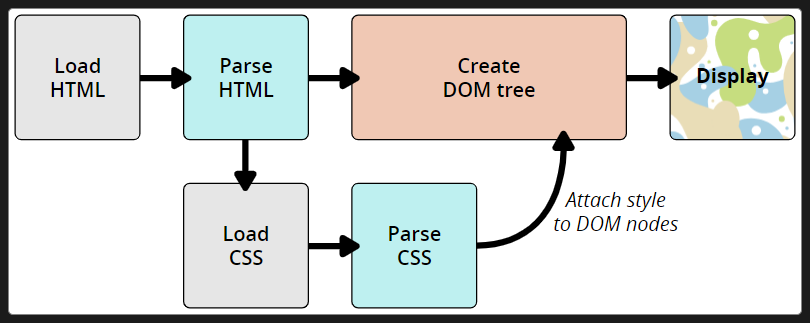

## Acerca del DOM

Un DOM tiene una estructura en forma de árbol. Cada elemento, atributo o bloque en el lenguaje de marcado se convierte en un nodo DOM con estructura de árbol. Los nodos se definen por su relación con otros nodos DOM. Algunos elementos son padres de nodos secundarios, y estos nodos hijos tienen hermanos.

Comprender el DOM te ayuda a diseñar, depurar y mantener tu CSS porque en el DOM es donde tu CSS se encuentra con el contenido del documento. Cuando comiences a trabajar con las herramientas DevTools (o herramientas del desarrollador) del navegador, te moverás por el DOM mientras seleccionas elementos con el fin de ver qué reglas se aplican.

## Una representación real de un DOM

In [1]:
<!-- para el código HTML -->
<p>
    Usaremos:
    <span>Hojas</span>
    <span>de estilo</span>
    <span>en cascada</span>
</p>
<!-- en el DOM, el nodo que se corresponde con nuestro elemento <p> es un padre. Sus hijos son un nodo de texto y los tres nodos correspondientes a nuestros elementos <span>. Los nodos SPAN son también los padres, y los nodos de texto sus hijos:
P
├─ "Usaremos:"
├─ SPAN
|  └─ "Hojas"
├─ SPAN
|  └─ "de estilo"
└─ SPAN
    └─ "en cascada"
-->

<!-- para el código HTML -->
 
 Usaremos:
 Hojas 
 de estilo 
 en cascada 
 
<!-- en el DOM, el nodo que se corresponde con nuestro elemento es un padre. Sus hijos son un nodo de texto y los tres nodos correspondientes a nuestros elementos . Los nodos SPAN son también los padres, y los nodos de texto sus hijos:
P
├─ "Usaremos:"
├─ SPAN
| └─ "Hojas"
├─ SPAN
| └─ "de estilo"
└─ SPAN
 └─ "en cascada"
-->

## La aplicación de CSS al DOM

Pongamos que hemos añadido un poco de CSS a nuestro documento, para darle estilo.

In [2]:
<style>
    span {
        border: 1px solid black;
        background-color: lime;
    }
</style>
<!-- el navegador analizará el código HTML y creará un DOM a partir de este. A continuación, analizará el CSS. Dado que la única regla disponible en el CSS tiene un selector span, el navegador ¡ordenará el CSS muy rápidamente! Aplicará la regla a cada uno de los tres <span>, que mostrarán en pantalla la representación visual final. -->
<p>
    Usaremos:
    <span>Hojas</span>
    <span>de estilo</span>
    <span>en cascada</span>
</p>

<!-- el navegador analizará el código HTML y creará un DOM a partir de este. A continuación, analizará el CSS. Dado que la única regla disponible en el CSS tiene un selector span, el navegador ¡ordenará el CSS muy rápidamente! Aplicará la regla a cada uno de los tres , que mostrarán en pantalla la representación visual final. -->
 
 Usaremos:
 Hojas 
 de estilo 
 en cascada

## ¿Qué ocurre si un navegador encuentra CSS que no entiende?

No todos los navegadores implementan las novedades de CSS en el mismo momento. Además, no todo el mundo utiliza la última versión de un navegador. Dado que el CSS está en desarrollo constante y, por lo tanto, por delante de lo que los navegadores pueden reconocer, puede que te preguntes qué sucede si un navegador encuentra un selector o una declaración CSS que no reconoce.

La respuesta es que no hace nada y simplemente pasa a la siguiente parte del CSS.

Si un navegador analiza tus reglas y encuentra una propiedad o un valor que no entiende, lo ignora y avanza hasta la declaración siguiente. Esto sucederá si has cometido un error y has escrito mal una propiedad o un valor, o si la propiedad o el valor son demasiado nuevos y el navegador aún no los admite.

Del mismo modo, si un navegador encuentra un selector que no entiende, lo ignorará y pasará al siguiente.

In [3]:
<style>
    p {
        font-weight: bold;
        colour: blue; /* Ortografía incorrecta de la propiedad color */
        font-size: 200%;
    }
</style>
<p>Quiero este texto en grande, en negrita y en color azul.</p>

Quiero este texto en grande, en negrita y en color azul.

Este comportamiento es muy útil. Significa que puedes utilizar el CSS nuevo como una mejora, a sabiendas de que no se producirá ningún error si no se entiende: o bien el navegador entiende la característica nueva o no lo hace. Combinado con el funcionamiento del modo en cascada con el hecho de que los navegadores utilizarán la última CSS que encuentren en la hoja de estilo, cuando haya dos reglas con el mismo nivel de especificidad, también puedes ofrecer alternativas para los navegadores que no admiten el CSS nuevo.

Esto funciona especialmente bien cuando quieres utilizar un valor que es bastante nuevo que no admiten todos los navegadores. Por ejemplo, algunos navegadores antiguos no entienden `calc()` como valor. Podríamos dar un valor de sustitución para el ancho de una caja en píxeles, y a continuación dar un ancho con un valor `calc()` de `100% - 50px`. Los navegadores antiguos usarán la versión en píxeles y harán caso omiso de la indicación `calc()`, porque no la entienden. Los navegadores nuevos interpretarán la línea del ancho en píxeles, pero la anularán al llegar a la línea de `calc()` porque aparece después en la cascada.

In [5]:
<style>
    .box {
        background-color: orange;
        width: 500px;
        width: calc(100% - 50px);
    }
</style>
<div class="box">.</div>

.